In [2]:
#import packages and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Codes=pd.read_csv("ATUS_Survey/codes.csv")
Activities=pd.read_csv("ATUS_Survey/atusact.csv")
Summary=pd.read_csv("ATUS_Survey/atussum.csv")
Respondent=pd.read_csv("ATUS_Survey/atusresp.csv")
#print(SU.head(10))
N_people=len(Summary["tucaseid"])  #Initialize all dataframes and store number of people as variable
Roster=pd.read_csv("ATUS_Survey/atusrost.csv")

In [2]:
#Tabulate how much sleep each ID got (Slow)

import math
SleepDict={} 
for ind, row in Activities.iterrows():
    if (row["trcodep"]==10101) | (row["trcodep"]==10199):
        if row["tucaseid"] in SleepDict.keys():
            SleepDict[row["tucaseid"]]+=row["tuactdur24"]
        else:
            SleepDict[row["tucaseid"]]=row["tuactdur24"]

In [3]:
def Hour_Decimal(time):
    L=time.split(":")
    return int(L[0])+int(L[1])/60 +int(L[2])/3600
Hour_Decimal(Activities["tustarttim"][1])>=4

True

In [4]:
#Split Times by morning sleep (from the previous night), and night sleep

SleepDict1={} 
SleepDict2={} 
for ind, row in Activities.iterrows():
    if (row["trcodep"]==10101) | (row["trcodep"]==10199):
        if (Hour_Decimal(row["tustarttim"])>=4) & (Hour_Decimal(row["tustarttim"])<=8):
            if row["tucaseid"] in SleepDict1.keys():
                SleepDict1[row["tucaseid"]]+=row["tuactdur24"]
            else:
                SleepDict1[row["tucaseid"]]=row["tuactdur24"]
        else:
            if row["tucaseid"] in SleepDict2.keys():
                SleepDict2[row["tucaseid"]]+=row["tuactdur24"]
            else:
                SleepDict2[row["tucaseid"]]=row["tuactdur24"]

In [25]:
AgeDict={}
for ind,row in Roster.iterrows():
    if (row["tulineno"]==1):
        AgeDict[row["tucaseid"]]=row["teage"]

In [26]:
print(AgeDict)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
#Combine day of week and stat weight from Respondent file with Sleep amount from above

cols=["DayOfWeek","Sleep","Weight"]

SleepList=[]
SleepInd=0
#SleepData.loc[1]=[5,2]

for ind, row in Respondent.iterrows():
    if (row["tulineno"]==1 and math.isnan(row["tudiaryday"]) != True) and row["tucaseid"] in SleepDict.keys():
        SleepList.append([row["tudiaryday"],SleepDict[row["tucaseid"]],row["tufnwgtp"]])
        #SleepData.loc[SleepInd]=[row["teage"],SleepDict[row["tucaseid"]]]
        #SleepInd+=1
SleepData=pd.DataFrame(SleepList,columns=cols)
SleepData["WeightXSleep"]=SleepData["Weight"]*SleepData["Sleep"]
print(SleepData.head())

   DayOfWeek  Sleep     Weight  WeightXSleep
0          6    870  8155463.0  7.095253e+09
1          7    620  1735323.0  1.075900e+09
2          7    560  3830528.0  2.145096e+09
3          5    720  6622023.0  4.767857e+09
4          5    385  3068387.0  1.181329e+09


In [27]:
#Combine day of week and stat weight from Respondent file with Sleep amount from above
#Use morning and night separated sleep

import math

cols=["DayOfWeek","Sleep","Weight","Age"]

SleepList1=[]
SleepList2=[]

for ind, row in Respondent.iterrows():
    if (row["tulineno"]==1 and math.isnan(row["tudiaryday"]) != True) and row["tucaseid"] in SleepDict1.keys():
        SleepList1.append([row["tudiaryday"],SleepDict1[row["tucaseid"]],row["tufnwgtp"],AgeDict[row["tucaseid"]]])
    if (row["tulineno"]==1 and math.isnan(row["tudiaryday"]) != True) and row["tucaseid"] in SleepDict2.keys():
        SleepList2.append([row["tudiaryday"],SleepDict2[row["tucaseid"]],row["tufnwgtp"],AgeDict[row["tucaseid"]]])
SleepData1=pd.DataFrame(SleepList1,columns=cols)
SleepData1["WeightXSleep"]=SleepData1["Weight"]*SleepData1["Sleep"]
print(SleepData1.head())
SleepData2=pd.DataFrame(SleepList2,columns=cols)
SleepData2["WeightXSleep"]=SleepData2["Weight"]*SleepData2["Sleep"]
print(SleepData2.head())

   DayOfWeek  Sleep     Weight  Age  WeightXSleep
0          6    600  8155463.0   60  4.893278e+09
1          7    180  1735323.0   41  3.123581e+08
2          7    300  3830528.0   26  1.149158e+09
3          5    360  6622023.0   36  2.383928e+09
4          5     60  3068387.0   51  1.841032e+08
   DayOfWeek  Sleep     Weight  Age  WeightXSleep
0          6    270  8155463.0   60  2.201975e+09
1          7    440  1735323.0   41  7.635421e+08
2          7    260  3830528.0   26  9.959373e+08
3          5    360  6622023.0   36  2.383928e+09
4          5    325  3068387.0   51  9.972258e+08


In [25]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [4]:
#Pivot all data into bins by day of week

grouped = SleepData.groupby('DayOfWeek').sum()
grouped['wtdavg'] = grouped['WeightXSleep'] / grouped['Weight']
print(grouped.head())

              Sleep        Weight  WeightXSleep      wtdavg
DayOfWeek                                                  
1          24810779  1.624898e+11  9.333707e+13  574.418012
2           8704136  1.626074e+11  8.283574e+13  509.421595
3           8534821  1.634645e+11  8.219630e+13  502.839012
4           8560125  1.633597e+11  8.246685e+13  504.817634
5           8335856  1.627144e+11  8.147268e+13  500.709858


In [45]:
#Pivot all data into bins by age

grouped1A = SleepData1.groupby('Age').sum()
grouped1A['wtdavg'] = grouped1A['WeightXSleep'] / grouped1A['Weight']
print(grouped1A.head())
grouped2A = SleepData2.groupby('Age').sum()
grouped2A['wtdavg'] = grouped2A['WeightXSleep'] / grouped2A['Weight']
print(grouped2A.head())

#Combine morning and night sleep
GroupedSplitA=[]
Remap=[2,3,4,5,6,7,1]
for i in grouped1A["wtdavg"].keys():
    GroupedSplitA.append((grouped1A["wtdavg"][i]+grouped2A["wtdavg"][i])/60)

     DayOfWeek   Sleep        Weight  WeightXSleep      wtdavg
Age                                                           
15        7919  512062  1.707799e+10  3.925330e+12  229.847252
16       11204  725452  2.369483e+10  5.611448e+12  236.821654
17       10285  699343  2.307756e+10  5.656486e+12  245.107594
18        7421  538764  1.830151e+10  5.151680e+12  281.489336
19        5549  412551  1.507080e+10  4.372188e+12  290.109802
     DayOfWeek   Sleep        Weight  WeightXSleep      wtdavg
Age                                                           
15        7978  698856  1.726384e+10  6.045150e+12  350.162465
16       11221  918857  2.393574e+10  8.024793e+12  335.264051
17       10183  855069  2.298301e+10  7.635006e+12  332.202094
18        7335  548520  1.813037e+10  5.597840e+12  308.754926
19        5484  409420  1.505448e+10  4.492657e+12  298.426617


Text(0,0.5,'Average Sleep (hrs)')

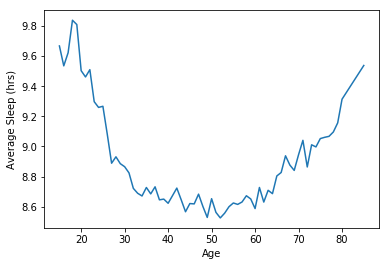

In [47]:
plt.plot(grouped1A["wtdavg"].keys(),GroupedSplitA)
plt.xlabel('Age')
plt.ylabel('Average Sleep (hrs)')

In [1]:
import numpy as np

Window=2
Edges=np.arange(np.ceil(65/Window))*Window+15
Sums=np.zeros((len(Edges)-1,1))
Counts=np.zeros((len(Edges)-1,1))
for ind,i in enumerate(Edges[0:len(Edges)-1]):
    for ind2,age in enumerate(grouped1A["wtdavg"].keys()):
        if (age>=i) & (age<i+Window):
            Sums[ind]+=GroupedSplitA[ind2]
            Counts[ind]+=1
Avgs=Sums/Counts   

plt.plot(Edges[0:len(Edges)-1],Avgs)
plt.xlabel('Age')
plt.ylabel('Average Sleep per Night (hrs)')
plt.savefig("SleepVsAge_W2.png")

NameError: name 'grouped1A' is not defined

In [79]:
np.ceil(5.6)

6.0

In [30]:
#Pivot all data into bins by day of week

grouped1 = SleepData1.groupby('DayOfWeek').sum()
grouped1['wtdavg'] = grouped1['WeightXSleep'] / grouped1['Weight']
print(grouped1.head())
grouped2 = SleepData2.groupby('DayOfWeek').sum()
grouped2['wtdavg'] = grouped2['WeightXSleep'] / grouped2['Weight']
print(grouped2.head())

#Combine morning and night sleep
GroupedSplit=[]
Remap=[2,3,4,5,6,7,1]
for i in np.arange(7)+1:
    GroupedSplit.append((grouped1["wtdavg"][Remap[i-1]]+grouped2["wtdavg"][i])/60)

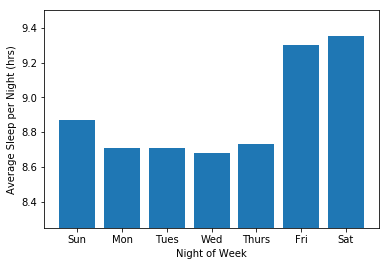

In [37]:
#Plot

plt.bar([1,2,3,4,5,6,7],GroupedSplit)
plt.ylim([8.25,9.5])
plt.xlabel("Night of Week")
plt.xticks(np.arange(7)+1,('Sun','Mon','Tues','Wed','Thurs','Fri','Sat'))
plt.ylabel("Average Sleep per Night (hrs)")
plt.savefig("SleepVsDOW.png")

Text(0,0.5,'Average Sleep per Night (hrs)')

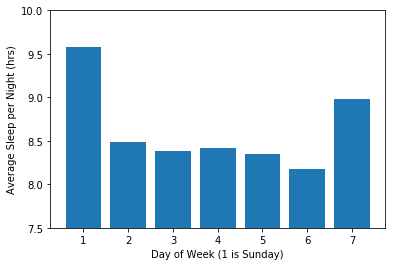

In [9]:
#Plot

plt.bar([1,2,3,4,5,6,7],grouped["wtdavg"]/60)
plt.ylim([7.5,10])
plt.xlabel("Day of Week (1 is Sunday)")
plt.ylabel("Average Sleep per Night (hrs)")